###Model CNN

In [1]:
import librosa
import numpy as np
import os
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pickle

In [83]:
with open('/content/drive/MyDrive/Praca_Inżynierska_Dominik_Ossowski/Dane_Inżynierka_Dominik_Ossowski/extracted_features_soxr_hq.df', 'rb') as file:
    extracted_features_copy_all = pickle.load(file)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
extracted_features_copy_all

,genre,features
0,Hip-Hop,"[[-331.41824, 95.99606, -25.466045, 18.971329,..."
1,Hip-Hop,"[[-308.35553, 69.364334, 5.986863, 47.842987, ..."
2,Hip-Hop,"[[-349.44122, 127.23545, -4.3016386, 4.849605,..."
3,Pop,"[[-209.57384, 44.123947, -34.430008, 13.012472..."
4,Hip-Hop,"[[-282.58325, 48.749207, 78.15404, 1.7475528, ..."
...,...,...
24879,Instrumental,"[[-447.8207, 137.37451, -8.227509, 17.44024, 1..."
24880,Folk,"[[-190.82816, 143.20755, 10.690748, 73.98483, ..."
24881,Folk,"[[-81.570755, 108.5269, 2.0659103, 19.400057, ..."
24882,Experimental,"[[-175.63293, 91.08409, -80.6078, 13.257477, -..."


In [87]:
X=np.array(extracted_features_copy_all['features'].tolist())
y=np.array(extracted_features_copy_all['genre'])

In [88]:
X.shape

(24884, 1291, 13)

In [89]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [90]:
y.shape

(24884, 14)

In [91]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)
print(y_train.shape)

(17916, 1291, 13)
(4977, 1291, 13)
(1991, 1291, 13)
(17916, 14)


In [94]:
X_train = X_train[..., np.newaxis]
X_valid = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [95]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(17916, 1291, 13, 1)
(4977, 1291, 13, 1)
(1991, 1291, 13, 1)


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_addons as tfa

In [73]:
!pip3 install --upgrade tensorflow_addons

In [96]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

In [76]:
input_shape

(1291, 13, 1)

In [97]:
model = keras.Sequential()


model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Conv2D(128, (2, 2), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.6))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(14, activation='softmax'))

In [61]:
model.save('CNN_soxr_hq.keras')

In [98]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 1289, 11, 32)      320       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 645, 6, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_33 (Ba  (None, 645, 6, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_44 (Dropout)        (None, 645, 6, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 643, 4, 128)       36992     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 322, 2, 128)     

In [99]:
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/sample_data', save_best_only=True,verbose=1)

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy',tfa.metrics.F1Score(num_classes=14,
                                                  average='micro',
                                                  threshold=0.5)])


Ten model będę w stanie przetestować dopiero jak wykupię więcej zasobó na google colab (out of memory error podczas ładowania datasetu)

In [100]:
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_valid, y_validation), callbacks=[checkpointer],verbose=1)

Epoch 1/100
559/560 [============================>.] - ETA: 0s - loss: 2.9062 - accuracy: 0.3402 - f1_score: 0.3308
Epoch 1: val_loss improved from inf to 4.71374, saving model to /content/sample_data
560/560 [==============================] - 20s 32ms/step - loss: 2.9050 - accuracy: 0.3402 - f1_score: 0.3308 - val_loss: 4.7137 - val_accuracy: 0.3194 - val_f1_score: 0.3254
Epoch 2/100
559/560 [============================>.] - ETA: 0s - loss: 2.2842 - accuracy: 0.4095 - f1_score: 0.3979
Epoch 2: val_loss improved from 4.71374 to 4.12884, saving model to /content/sample_data
560/560 [==============================] - 17s 31ms/step - loss: 2.2831 - accuracy: 0.4095 - f1_score: 0.3980 - val_loss: 4.1288 - val_accuracy: 0.3415 - val_f1_score: 0.3427
Epoch 3/100
559/560 [============================>.] - ETA: 0s - loss: 1.9802 - accuracy: 0.4405 - f1_score: 0.4256
Epoch 3: val_loss improved from 4.12884 to 2.76385, saving model to /content/sample_data
560/560 [==============================

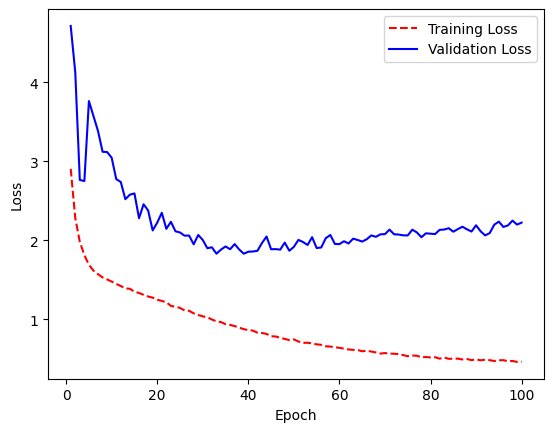

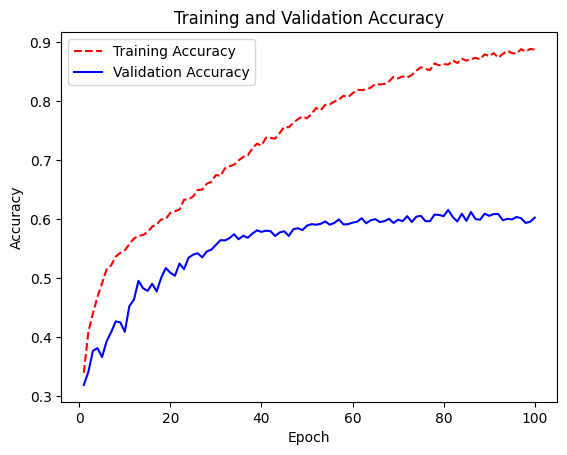

In [101]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, validation_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
def predict(model, X, y):

    X = X[np.newaxis, ...]

    # perform prediction
    prediction = model.predict(X)

    predicted_index = np.argmax(prediction, axis=1)

    p = np.argmax(y, axis=0)

    print("Target: {}, Predicted label: {}".format(p, predicted_index))

In [ ]:
X_to_predict = X_test_scaled[101]
y_to_predict = y_test[101]

predict(model, X_to_predict, y_to_predict)

In [ ]:
dict(zip(labelencoder.classes_,range(len(labelencoder.classes_))))

In [102]:
test_loss, test_acc, *is_anything_else_being_returned = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

156/156 - 1s - loss: 2.1903 - accuracy: 0.6036 - f1_score: 0.6088 - 923ms/epoch - 6ms/step

Test accuracy: 0.6035764813423157
